In [9]:
!pip install kaggle
"""
To use the Kaggle API, sign up for a Kaggle account at https://www.kaggle.com. 
Then go to the 'Account' tab of your user profile (https://www.kaggle.com/<username>/account) and select 'Create API Token'. 
This will trigger the download of kaggle.json, a file containing your API credentials.
Upload that file to google colab/google cloud platform 
"""
api_token = {"username":"surabhimv","key":"6486570e714dc5adf89e540c7913012d"}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c 'telstra-recruiting-network'



  0% 0.00/557k [00:00<?, ?B/s]
100% 557k/557k [00:00<00:00, 46.4MB/s]


In [11]:
!unzip telstra-recruiting-network.zip

Archive:  telstra-recruiting-network.zip
  inflating: event_type.csv.zip      
  inflating: log_feature.csv.zip     
  inflating: resource_type.csv.zip   
  inflating: sample_submission.csv.zip  
  inflating: severity_type.csv.zip   
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [14]:
!unzip event_type.csv.zip

Archive:  event_type.csv.zip
replace event_type.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [15]:
!unzip log_feature.csv.zip

Archive:  log_feature.csv.zip
replace log_feature.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [17]:
!unzip resource_type.csv.zip

Archive:  resource_type.csv.zip
replace resource_type.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [19]:
!unzip severity_type.csv.zip

Archive:  severity_type.csv.zip
replace severity_type.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [20]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [22]:
!unzip test.csv.zip

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [57]:
import pandas as pd
df1=pd.read_csv('event_type.csv')
print(df1)

         id     event_type
0      6597  event_type 11
1      8011  event_type 15
2      2597  event_type 15
3      5022  event_type 15
4      5022  event_type 11
...     ...            ...
31165  3761  event_type 11
31166  8720  event_type 11
31167  6488  event_type 11
31168   878  event_type 11
31169  4464  event_type 11

[31170 rows x 2 columns]


In [58]:
df2=pd.read_csv('log_feature.csv')
print(df2)

         id  log_feature  volume
0      6597   feature 68       6
1      8011   feature 68       7
2      2597   feature 68       1
3      5022  feature 172       2
4      5022   feature 56       1
...     ...          ...     ...
58666  8720  feature 209       1
58667  6488   feature 54       3
58668   878   feature 62       1
58669  4464  feature 209       1
58670  4464   feature 87       2

[58671 rows x 3 columns]


In [59]:
df3=pd.read_csv('resource_type.csv')
print(df3)

         id    resource_type
0      6597  resource_type 8
1      8011  resource_type 8
2      2597  resource_type 8
3      5022  resource_type 8
4      6852  resource_type 8
...     ...              ...
21071  3761  resource_type 8
21072  8720  resource_type 8
21073  6488  resource_type 8
21074   878  resource_type 8
21075  4464  resource_type 8

[21076 rows x 2 columns]


In [60]:
df4=pd.read_csv('severity_type.csv')
print(df4)

         id    severity_type
0      6597  severity_type 2
1      8011  severity_type 2
2      2597  severity_type 2
3      5022  severity_type 1
4      6852  severity_type 1
...     ...              ...
18547  3761  severity_type 1
18548  8720  severity_type 1
18549  6488  severity_type 2
18550   878  severity_type 2
18551  4464  severity_type 1

[18552 rows x 2 columns]


In [61]:
df5=pd.read_csv('train.csv')
print(df5)

         id       location  fault_severity
0     14121   location 118               1
1      9320    location 91               0
2     14394   location 152               1
3      8218   location 931               1
4     14804   location 120               0
...     ...            ...             ...
7376    870   location 167               0
7377  18068   location 106               0
7378  14111  location 1086               2
7379  15189     location 7               0
7380  17067   location 885               0

[7381 rows x 3 columns]


In [62]:
df=pd.read_csv('test.csv')
print(df)

          id       location
0      11066   location 481
1      18000   location 962
2      16964   location 491
3       4795   location 532
4       3392   location 600
...      ...            ...
11166  14806  location 1073
11167   1825    location 11
11168   2374   location 917
11169   7277   location 208
11170   9886   location 438

[11171 rows x 2 columns]


In [63]:
import re
d=df4['severity_type'].values
s=[]
print(d)
for i in d:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s.append(int(q1))

df4['severity_type']=s
print(df4)



['severity_type 2' 'severity_type 2' 'severity_type 2' ...
 'severity_type 2' 'severity_type 2' 'severity_type 1']
         id  severity_type
0      6597              2
1      8011              2
2      2597              2
3      5022              1
4      6852              1
...     ...            ...
18547  3761              1
18548  8720              1
18549  6488              2
18550   878              2
18551  4464              1

[18552 rows x 2 columns]


In [31]:

d1=df3['resource_type'].values
s1=[]

for i in d1:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s1.append(int(q1))

df3['resource_type']=s1
print(df3)

         id  resource_type
0      6597              8
1      8011              8
2      2597              8
3      5022              8
4      6852              8
...     ...            ...
21071  3761              8
21072  8720              8
21073  6488              8
21074   878              8
21075  4464              8

[21076 rows x 2 columns]


In [32]:

d2=df2['log_feature'].values
s2=[]

for i in d2:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s2.append(int(q1))

df2['log_feature']=s2
print(df2)

         id  log_feature  volume
0      6597           68       6
1      8011           68       7
2      2597           68       1
3      5022          172       2
4      5022           56       1
...     ...          ...     ...
58666  8720          209       1
58667  6488           54       3
58668   878           62       1
58669  4464          209       1
58670  4464           87       2

[58671 rows x 3 columns]


In [33]:
import re
d1=df1['event_type'].values
s3=[]

for i in d1:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s3.append(int(q1))

df1['event_type']=s3
print(df1)

         id  event_type
0      6597          11
1      8011          15
2      2597          15
3      5022          15
4      5022          11
...     ...         ...
31165  3761          11
31166  8720          11
31167  6488          11
31168   878          11
31169  4464          11

[31170 rows x 2 columns]


In [34]:
import re
d5=df5['location'].values
s5=[]

for i in d5:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s5.append(int(q1))

df5['location']=s5
print(df5)

         id  location  fault_severity
0     14121       118               1
1      9320        91               0
2     14394       152               1
3      8218       931               1
4     14804       120               0
...     ...       ...             ...
7376    870       167               0
7377  18068       106               0
7378  14111      1086               2
7379  15189         7               0
7380  17067       885               0

[7381 rows x 3 columns]


In [35]:
dff= pd.merge(df1,df2,on='id')
dff1=pd.merge(dff,df3,on='id')
dff2=pd.merge(dff1,df4,on='id')
dff3=pd.merge(dff2,df5,on='id')
print(dff3)


         id  event_type  log_feature  volume  resource_type  severity_type  \
0      8011          15           68       7              8              2   
1      2588          15           82       9              8              1   
2      2588          15          201       5              8              1   
3      2588          15           80      15              8              1   
4      2588          15          203       5              8              1   
...     ...         ...          ...     ...            ...            ...   
61834  8114          11           54       1              8              2   
61835  8114          11           87       3              8              2   
61836   878          11           62       1              8              2   
61837  4464          11          209       1              8              1   
61838  4464          11           87       2              8              1   

       location  fault_severity  
0             1              

In [36]:
#EDA
dff3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              61839 non-null  int64
 1   event_type      61839 non-null  int64
 2   log_feature     61839 non-null  int64
 3   volume          61839 non-null  int64
 4   resource_type   61839 non-null  int64
 5   severity_type   61839 non-null  int64
 6   location        61839 non-null  int64
 7   fault_severity  61839 non-null  int64
dtypes: int64(8)
memory usage: 4.2 MB


In [37]:
dff3.describe()

,id,event_type,log_feature,volume,resource_type,severity_type,location,fault_severity
count,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000
mean,9104.379469,24.887482,211.245411,8.390336,4.557334,1.441566,580.234836,0.549168
std,5387.274195,12.007950,94.919318,22.902491,2.863860,0.589572,318.089156,0.727701
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4353.000000,13.000000,134.000000,1.000000,2.000000,1.000000,304.000000,0.000000
50%,8981.000000,23.000000,228.000000,2.000000,2.000000,1.000000,607.000000,0.000000
75%,13664.000000,35.000000,306.000000,6.000000,8.000000,2.000000,834.000000,1.000000
max,18550.000000,54.000000,384.000000,877.000000,10.000000,5.000000,1126.000000,2.000000


In [38]:
dff3.isnull().value_counts()

id     event_type  log_feature  volume  resource_type  severity_type  location  fault_severity
False  False       False        False   False          False          False     False             61839
dtype: int64

In [39]:
dff3['fault_severity'].value_counts()                                           #data is imbalanced

0    36597
1    16524
2     8718
Name: fault_severity, dtype: int64

In [40]:
dff3.shape

(61839, 8)

In [42]:
dff3.corr()['fault_severity']

id               -0.045528
event_type       -0.262184
log_feature      -0.208400
volume           -0.027196
resource_type     0.285475
severity_type    -0.325157
location          0.270390
fault_severity    1.000000
Name: fault_severity, dtype: float64

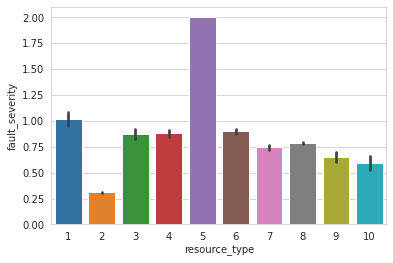

In [82]:
import seaborn as sns
sns.barplot(x='resource_type',y='fault_severity',data=dff3)

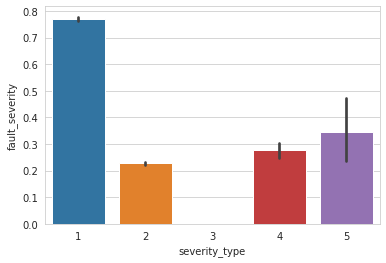

In [74]:
sns.barplot(x='severity_type',y='fault_severity',data=dff3)

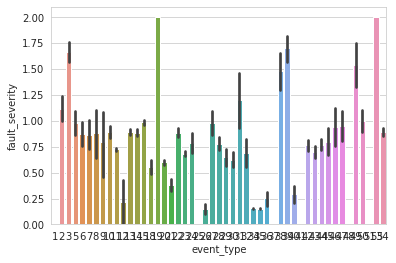

In [75]:
sns.barplot(x='event_type',y='fault_severity',data=dff3)

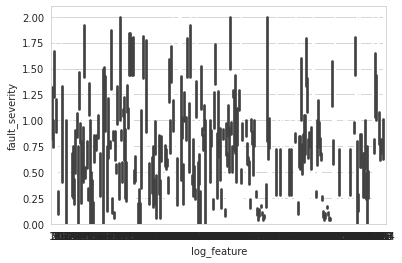

In [76]:
sns.barplot(x='log_feature',y='fault_severity',data=dff3)

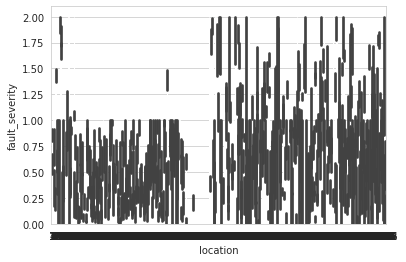

In [77]:
sns.barplot(x='location',y='fault_severity',data=dff3)

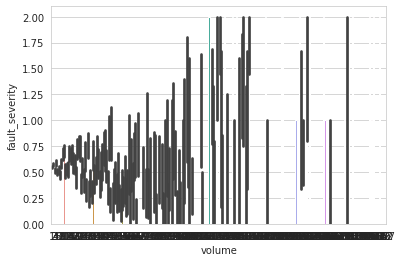

In [78]:
sns.barplot(x='volume',y='fault_severity',data=dff3)

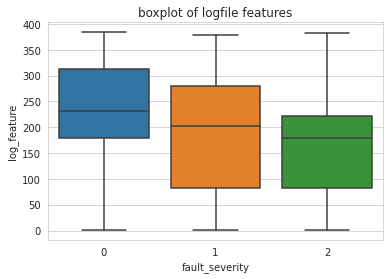

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt                                                 #boxplot representation of feature log_feature
ax = sns.boxplot(x="fault_severity", y="log_feature", data=dff3)                
plt.title("boxplot of logfile features")
plt.show()

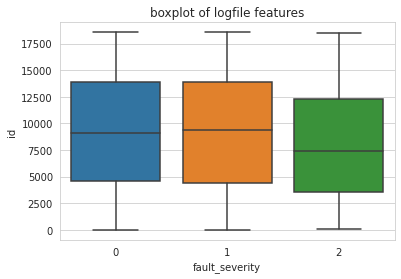

In [85]:
ax = sns.boxplot(x="fault_severity", y="id", data=dff3)                         ##boxplot representation of feature id
plt.title("boxplot of logfile features")
plt.show()

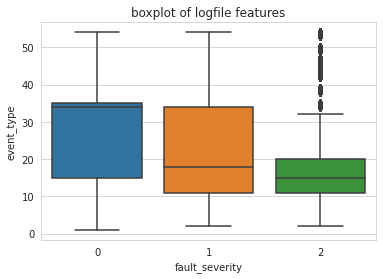

In [86]:

ax = sns.boxplot(x="fault_severity", y="event_type", data=dff3)                 ##boxplot representation of feature event_type
plt.title("boxplot of logfile features")
plt.show()

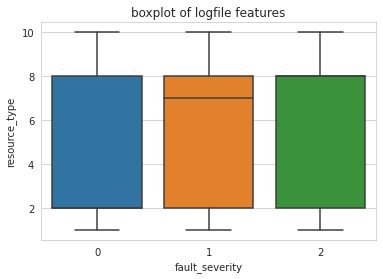

In [87]:

ax = sns.boxplot(x="fault_severity", y="resource_type", data=dff3)              ##boxplot representation of feature resource_type
plt.title("boxplot of logfile features")
plt.show()

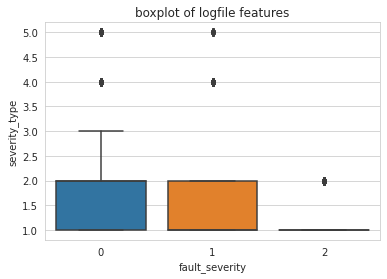

In [88]:
ax = sns.boxplot(x="fault_severity", y="severity_type", data=dff3)              #boxplot representation of feature severity_type
plt.title("boxplot of logfile features")
plt.show()

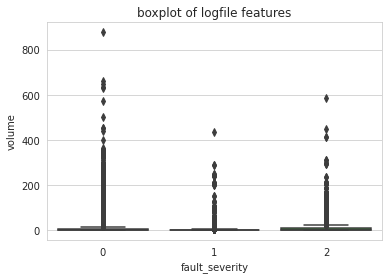

In [89]:
ax = sns.boxplot(x="fault_severity", y="volume", data=dff3)                   #boxplot representation of feature location
plt.title("boxplot of logfile features")
plt.show()

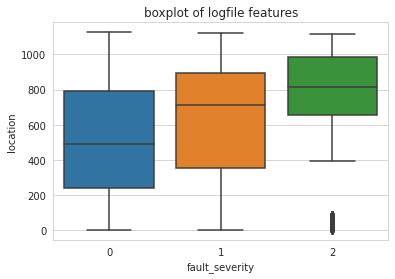

In [90]:
ax = sns.boxplot(x="fault_severity", y="location", data=dff3)                   #boxplot representation of feature location
plt.title("boxplot of logfile features")
plt.show()

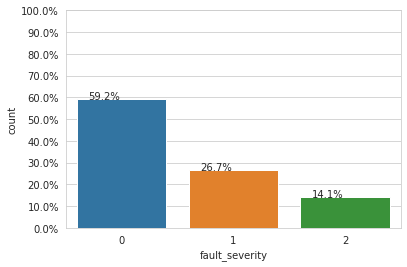

In [91]:
import numpy as np                                                              #distribution of fault_severity
total = len(dff3)*1.
ax=sns.countplot(x="fault_severity", data=dff3)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

In [92]:
y=dff3['fault_severity']
X=dff3.drop(['fault_severity'],axis=1)
print(X)
print(y)

         id  event_type  log_feature  volume  resource_type  severity_type  \
0      8011          15           68       7              8              2   
1      2588          15           82       9              8              1   
2      2588          15          201       5              8              1   
3      2588          15           80      15              8              1   
4      2588          15          203       5              8              1   
...     ...         ...          ...     ...            ...            ...   
61834  8114          11           54       1              8              2   
61835  8114          11           87       3              8              2   
61836   878          11           62       1              8              2   
61837  4464          11          209       1              8              1   
61838  4464          11           87       2              8              1   

       location  
0             1  
1             1  
2        

In [ ]:
aa=dff3.to_csv('new_dataset.csv')

In [93]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33,stratify=y)
Xtrain,Xcv,ytrain,ycv=train_test_split(Xtrain,ytrain,test_size=0.33,stratify=ytrain)
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)
print(Xcv.shape)
print(ycv.shape)


(27759, 7)
(27759,)
(20407, 7)
(20407,)
(13673, 7)
(13673,)


In [ ]:
import numpy as np
print(np.unique(ycv))
print(np.unique(ytest))
print(np.unique(ytrain))

[0 1 2]
[0 1 2]
[0 1 2]


In [95]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
         # if (str(feature_name) != str('id') and str(feature_name)!=str('fault_severity')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(Xtrain)
Xtrain1=result
print(Xtrain1)

             id  event_type  log_feature    volume  resource_type  \
952    0.561108    0.358491     0.347258  0.000000       0.111111   
79     0.439215    0.264151     0.206266  0.017123       0.777778   
60923  0.350100    0.188679     0.138381  0.003425       0.777778   
49014  0.093320    0.264151     0.569191  0.003425       0.111111   
53330  0.128363    0.188679     0.898172  0.001142       0.777778   
...         ...         ...          ...       ...            ...   
29918  0.124535    0.358491     0.073107  0.000000       0.777778   
50541  0.866677    0.264151     0.182768  0.000000       0.111111   
61224  0.194835    0.226415     0.441253  0.002283       0.333333   
4846   0.940320    0.264151     0.211488  0.021689       0.777778   
26692  0.656801    0.641509     0.603133  0.000000       0.111111   

       severity_type  location  
952             0.00  0.901333  
79              0.00  0.000000  
60923           0.25  0.873778  
49014           0.00  0.719111  
53330 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from multiprocessing import Process# this is used for multithreading
import multiprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#random model
yy=ytrain.values                                                                
print(yy)

y1=yy.reshape(-1, 1)

print(y1)
from sklearn.preprocessing import OneHotEncoder
def ohe(x):
  onehot_encoder = OneHotEncoder(sparse=False)
  onehot_encoded = onehot_encoder.fit_transform(x)
  hp=onehot_encoded.astype(int)
  return  hp
l1=ohe(y1)
print(l1[0])
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = Xtest.shape[0]
cv_data_len = Xcv.shape[0]

yt=ytest.values.reshape(-1,1)
yc=ycv.values.reshape(-1,1)
yte=ohe(yt)                                                                     #encoded y_test values
yce=ohe(yc)                                                                     #encoded y_cv values

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,3))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,3)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(yce,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,3))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,3)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(yte,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)                                #Returns the indices of the maximum values along an axis.

C = confusion_matrix(ytest, predicted_y)

print('confusion',C)
print('*'*100)
A =(((C.T)/(C.sum(axis=1))).T)
print('recal',A)
print('*'*100)
B =(C/C.sum(axis=0))
print('precision',B)

[0 1 1 ... 0 2 1]
[[0]
 [1]
 [1]
 ...
 [0]
 [2]
 [1]]
[1 0 0]
Log loss on Cross Validation Data using Random Model 1.338931821808408
Log loss on Test Data using Random Model 1.3416527129475746
confusion [[4073 4020 3984]
 [1812 1820 1821]
 [1000  940  937]]
****************************************************************************************************
recal [[0.33725263 0.33286412 0.32988325]
 [0.33229415 0.33376123 0.33394462]
 [0.34758429 0.32672923 0.32568648]]
****************************************************************************************************
precision [[0.59157589 0.59292035 0.59092257]
 [0.26318083 0.26843658 0.27009789]
 [0.14524328 0.13864307 0.13897953]]


In [ ]:
#knn
alpha = [x for x in range(1, 100, 4)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i,weights='distance')
    k_cfl.fit(Xtrain1,ytrain)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(Xtrain1, ytrain)
    predict_y = sig_clf.predict_proba(Xcv)
    cv_log_error_array.append(log_loss(ycv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
best_alpha = np.argmin(cv_log_error_array)
    



In [ ]:
k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha],weights='distance')
k_cfl.fit(Xtrain1,ytrain)
sig_clf1 = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf1.fit(Xtrain1, ytrain)
    
predict_y = sig_clf1.predict_proba(Xtrain1)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(ytrain, predict_y))
predict_y = sig_clf1.predict_proba(Xcv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(ycv, predict_y))
predict_y = sig_clf1.predict_proba(Xtest)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(ytest, predict_y))



C = confusion_matrix(ytest, sig_clf1.predict(Xtest))
print('confusion',C)
print('*'*100)
A =(((C.T)/(C.sum(axis=1))).T)
print('recal',A)
print('*'*100)
B =(C/C.sum(axis=0))
print('precision',B)

For values of best alpha =  17 The train log loss is: 0.16736203146291828
For values of best alpha =  17 The cross validation log loss is: 0.9690734537199082
For values of best alpha =  17 The test log loss is: 0.9602964342815254
confusion [[11437   551    89]
 [ 5084   302    67]
 [ 2527   318    32]]
****************************************************************************************************
recal [[0.94700671 0.04562391 0.00736938]
 [0.93233083 0.05538236 0.01228681]
 [0.8783455  0.1105318  0.0111227 ]]
****************************************************************************************************
precision [[0.60043049 0.470538   0.47340426]
 [0.26690466 0.25789923 0.35638298]
 [0.13266485 0.27156277 0.17021277]]


In [ ]:

#logistic regression
alpha = [10 ** x for x in range(-5, 4)]
print(alpha)
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced',solver='liblinear',multi_class='ovr')
    logisticR.fit(Xtrain1,ytrain)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(Xtrain1, ytrain)
    predict_y = sig_clf.predict_proba(Xcv)
    cv_log_error_array.append(log_loss(ycv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
best_alpha = np.argmin(cv_log_error_array)
    
logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced',solver='liblinear',multi_class='ovr')
logisticR.fit(Xtrain,ytrain)
sig_clf2 = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf2.fit(Xtrain1, ytrain)
pred_y=sig_clf2.predict(Xtest)

predict_y = sig_clf2.predict_proba(Xtrain1)
print ('For values of best alpha = ', alpha[best_alpha],'log loss for train data',log_loss(ytrain, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf2.predict_proba(Xcv)
print ('For values of best alpha = ', alpha[best_alpha],'log loss for cv data',log_loss(ycv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf2.predict_proba(Xtest)
print ('For values of best alpha = ', alpha[best_alpha],'log loss for test data',log_loss(ytest, predict_y, labels=logisticR.classes_, eps=1e-15))

C = confusion_matrix(ytest, sig_clf2.predict(Xtest))
print('confusion',C)
print('*'*100)
A =(((C.T)/(C.sum(axis=1))).T)
print('recal',A)
print('*'*100)
B =(C/C.sum(axis=0))
print('precision',B)

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
For values of best alpha =  0.0001 log loss for train data 0.8866480503912654
For values of best alpha =  0.0001 log loss for cv data 2.461330533344743
For values of best alpha =  0.0001 log loss for test data 2.3113448041247957
confusion [[11286   791     0]
 [ 5134   319     0]
 [ 2610   267     0]]
****************************************************************************************************
recal [[0.9345036  0.0654964  0.        ]
 [0.94150009 0.05849991 0.        ]
 [0.90719499 0.09280501 0.        ]]
****************************************************************************************************
precision [[0.59306358 0.57443718        nan]
 [0.26978455 0.23166304        nan]
 [0.13715187 0.19389978        nan]]


In [ ]:
#random forest
alpha=[10,50,100,500]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1,class_weight='balanced_subsample',max_depth=None)
    r_cfl.fit(Xtrain1,ytrain)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(Xtrain1, ytrain)
    predict_y = sig_clf.predict_proba(Xcv)
    cv_log_error_array.append(log_loss(ycv, predict_y, labels=r_cfl.classes_, eps=1e-15))

best_alpha = np.argmin(cv_log_error_array)

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1,class_weight='balanced_subsample',max_depth=None)
r_cfl.fit(Xtrain1,ytrain)
sig_clf3 = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf3.fit(Xtrain1, ytrain)

predict_y = sig_clf3.predict_proba(Xtrain1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(ytrain, predict_y))
predict_y = sig_clf3.predict_proba(Xcv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(ycv, predict_y))
predict_y = sig_clf3.predict_proba(Xtest)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(ytest, predict_y))
C = confusion_matrix(ytest, sig_clf3.predict(Xtest))
print('confusion',C)
print('*'*100)
A =(((C.T)/(C.sum(axis=1))).T)
print('recal',A)
print('*'*100)
B =(C/C.sum(axis=0))
print('precision',B)

For values of best alpha =  10 The train log loss is: 0.1415187600700315
For values of best alpha =  10 The cross validation log loss is: 0.9396168165782628
For values of best alpha =  10 The test log loss is: 0.9396115012417116
confusion [[12077     0     0]
 [ 5453     0     0]
 [ 2877     0     0]]
****************************************************************************************************
recal [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
****************************************************************************************************
precision [[0.59180673        nan        nan]
 [0.26721223        nan        nan]
 [0.14098104        nan        nan]]


In [ ]:
pq=X.columns
print(pq)

Index(['id', 'event_type', 'log_feature', 'volume', 'resource_type',
       'severity_type', 'location'],
      dtype='object')


<BarContainer object of 7 artists>

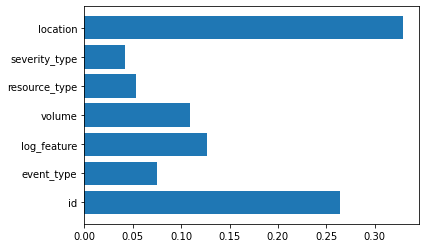

In [ ]:
plt.barh(r_cfl.feature_names_in_, r_cfl.feature_importances_)